<a href="https://colab.research.google.com/github/ushabolimera/Play-Store-App-Review-Analysis/blob/main/EDA_on_Play_Store_App_Reviews_by_Usha_Rani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem statement:**

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **Exploratory Data Analysis on Play Store Apps**

# Introduction:

Over the years, Google Play Store has evolved into a one-stop platform for downloading apps from different categories. It is the central hub for millions of apps for your smartphone. In this project, we will do a comprehensive analysis of the Play Store App by comparing over ten thousand apps and reviews across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.

The data used for this project consists of two files:


*   Play Store Data.csv : This dataset contains all the details of the applications on Google Play Store. There are 13 features for each app.
*   User Reviews.csv : It contains reviews for each app along with Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.



# **Exploring Play store data:**

In [ ]:
# Importing the required libraries for data analysis and visualization
  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading the csv file
data=pd.read_csv("/content/drive/My Drive/Alma Better/Projects/EDA - Play Store App Review Analysis/Play Store Data.csv")

In [ ]:
# Basic inspection
# Viewing the top 5 rows of the imported dataframe

data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Viewing the bottom 5 rows of the dataframe
data.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
# Finding the number of rows and columns in the given dataset
data.shape

(10841, 13)

Hence, we can say that there are a total of 10841 rows and 13 columns in this .csv file. Let us explore the columns, and the significance of the data it possesses.

In [ ]:
# Columns of this dataset are
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

**Let us first define what information the columns contain based on our inspection.**

* `App`: Contains the name of the app with a short description (optional).
* `Category`: It gives the category to the app.
* `Rating`: It contains the average rating the respective app received from its users.
* `Reviews`: It contains the number of users that have dropped a review for the respective app.
* `Size`: It contains the the disk space required to install the respective app.
* `Installs`: It gives the rounded figure of number of times the respective app was downloaded.
* `Type`: It states whether an app is free to use or paid.
* `Price`: It gives the price payable to install the app. For free type apps, the price is zero.
* `Content rating`: It states whether or not an app is suitable for all age groups or not.
* `Genres`: It gives the genre(s) to which the respective app belongs.
* `Last updated`: It gives the day in which the latest update was released.
* `Current Ver`: It gives the current version of the respective app.
* `Android Ver`: It gives the android version of the respective app.

In [ ]:
# Getting the infomation of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


The info() function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

In [ ]:
# Printing the describe statistics
data.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame. It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.



# **Handling the NaN values in the Play store data:** 

In [ ]:
# First of all lets find the number of NaN values in each column

data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Let us try to handle these NaN values one column at a time.



**1. `Rating`: There are a total of 1474 NaN values in this column.**

In [ ]:
# The rows containing NaN values in the Rating column
data[data["Rating"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


Also, we know that the rating of any app in the play store will be in between 1 and 5. Lets check whether there are any ratings out of this range.

In [ ]:
data[(data["Rating"] < 1 )| (data["Rating"] >5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


* There are a lot of errors the row corresponding to index number 10472. For example, the `Category` contains the value '1.9', which does not make any sense, the `Rating` is '19' which cannot be true, since the play store app reviews can be in between 1 and 5 only, and so on. So it is of our best interest to delete this row altogather so as to eliminate any errors as we proceed with the analysis.

In [ ]:
# Dropping the column having index number 10472
data.drop(index=10472,inplace=True)

In [ ]:
# Let's check again
data[(data["Rating"] < 1 )| (data["Rating"] >5)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


There is no such errors. So let's proceed futher

* The `Rating` column contains 1470 NaN values it is not practical to drop these rows because by doing so, we will loose a large amount of data, which may impact the final quality of the analysis. 
* The NaN values in this case can be imputed by the aggregate (mean or median) of the remaining values in the `Rating` column.

In [ ]:
# Finding mean and median in the Rating column excluding the NaN values.

mean_rating = data[~data['Rating'].isnull()]['Rating'].mean()

median_rating = data[~data['Rating'].isnull()]['Rating'].median()

[mean_rating, median_rating]

[4.191757420456978, 4.3]

Lets visualize this with a boxplot and a distplot.

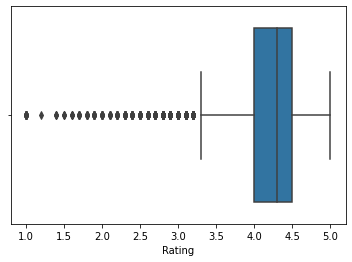

In [ ]:
# Boxplot
sns.boxplot(data=data["Rating"], x=data["Rating"])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


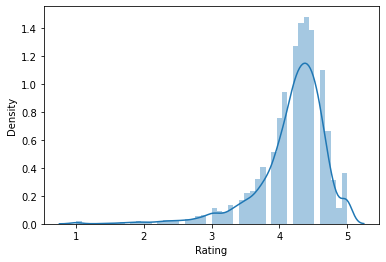

In [ ]:
# Distplot

sns.distplot(data["Rating"])

* The mean of the average ratings (excluding the NaN values) comes to be 4.2.
* The median of the entries (excluding the NaN values) in the 'Rating' column comes to be 4.3. From this we can say that 50% of the apps have an average rating of above 4.3, and the rest below 4.3.
* From the distplot visualizations, it is clear that the ratings are left skewed.
* We know that if the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.
* Hence we will impute the NaN values in the `Rating` column with its median.

In [ ]:
# Replacing the NaN values in the 'Rating' colunm with its median value
data["Rating"].fillna(value=median_rating,inplace=True)


In [ ]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

2.`Type`: This column contains only one NAN value

In [ ]:
# Let's see which column having null value
data[data['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,4.3,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


The `Type` column contains only two entries, namely, `Free` and `Paid`. Also, if the app is of type-`paid`, the price of that app will be printed in the corresponding `Price` column, else, it will show as '0'. In this case, the price for the respective app is printed as '0', which means the app is of type-`free`. Hence we can replace this NaN value with `Free`.

In [ ]:
# Replacing the NaN value in 'Type' column corresponding to row index 9148 with 'Free'
data.loc[9148,'Type']="Free"


In [ ]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64



3.Current Ver : This column contains 8 NAN values



In [ ]:
# The rows containing NaN values in the Current Ver column

data[data["Current Ver"].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,4.3,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,4.3,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,4.3,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.3,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


Since there are only 8 rows which contain NaN values in the `Current Ver` column, and there is no particular value with which we can replace it, these rows can be dropped.

In [ ]:
# dropping rows corresponding to the values which contain NaN in the column 'Current Ver'.

data=data[data['Current Ver'].notna()]


In [ ]:
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       2
dtype: int64



4. `Android Ver`:This column contains 2 NAN values

In [ ]:
# Finding the different values the 'Android Ver' column takes

data['Android Ver'].value_counts()

4.1 and up            2451
4.0.3 and up          1501
4.0 and up            1373
Varies with device    1362
4.4 and up             980
2.3 and up             651
5.0 and up             601
4.2 and up             393
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             240
2.1 and up             134
1.6 and up             115
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              31
5.1 and up              24
1.5 and up              19
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

Since the NaN values in the `Android Ver` column cannot be replaced by any particular value, and, since there are only 3 rows which contain NaN values in this column, which accounts to less than 0.03% of the total rows in the given dataset, it can be be dropped.

In [ ]:
# dropping rows corresponding to the to the NaN values in the 'Android Ver' column.

data = data[data['Android Ver'].notna()]

In [ ]:
# Shape of the updated dataframe

data.shape

(10830, 13)

In [ ]:
# NaN values in each column

data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

We were successfully able to handle the NaN values in the `Android Ver` column.

# **Checking the data types in the Play store data:**

In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10830 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10830 non-null  object 
 1   Category        10830 non-null  object 
 2   Rating          10830 non-null  float64
 3   Reviews         10830 non-null  object 
 4   Size            10830 non-null  object 
 5   Installs        10830 non-null  object 
 6   Type            10830 non-null  object 
 7   Price           10830 non-null  object 
 8   Content Rating  10830 non-null  object 
 9   Genres          10830 non-null  object 
 10  Last Updated    10830 non-null  object 
 11  Current Ver     10830 non-null  object 
 12  Android Ver     10830 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


If we check the datatypes of the columns, there are five columns are having numarical data but only `Rating column` is a float data type. So we need to change the datatypes of remaining columns which are having numarical data. And we need to change the `Last Updated` column datatype from string to datetime.

**1. Changing the datatype of the `Last Updated` column from string to datetime.**

In [ ]:
# values taken by the last updated column

data['Last Updated'].value_counts()

August 3, 2018        326
August 2, 2018        304
July 31, 2018         294
August 1, 2018        285
July 30, 2018         211
                     ... 
April 7, 2015           1
September 22, 2014      1
October 3, 2015         1
March 13, 2015          1
March 23, 2014          1
Name: Last Updated, Length: 1376, dtype: int64

In [ ]:
# The datetime.strptime funtion applied to the values in the last updated column to convert datatype from string to datetime
data['Last Updated'] = data['Last Updated'].apply(lambda x: datetime.strptime(x,'%B %d, %Y'))
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10830 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10830 non-null  object        
 1   Category        10830 non-null  object        
 2   Rating          10830 non-null  float64       
 3   Reviews         10830 non-null  object        
 4   Size            10830 non-null  object        
 5   Installs        10830 non-null  object        
 6   Type            10830 non-null  object        
 7   Price           10830 non-null  object        
 8   Content Rating  10830 non-null  object        
 9   Genres          10830 non-null  object        
 10  Last Updated    10830 non-null  datetime64[ns]
 11  Current Ver     10830 non-null  object        
 12  Android Ver     10830 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 1.2+ MB


We have successfully converted the values in the `Last updated` column from string datatype to datetime datatype

**2. Handling the duplicates in the `App` column**

In [ ]:
data['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
Candy Crush Saga                                      7
8 Ball Pool                                           7
ESPN                                                  7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9649, dtype: int64

In [ ]:
# Inspecting the duplicates values.
data[data['App'] == '8 Ball Pool']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1675,8 Ball Pool,GAME,4.5,14198297,52M,"100,000,000+",Free,0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
1703,8 Ball Pool,GAME,4.5,14198602,52M,"100,000,000+",Free,0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
1755,8 Ball Pool,GAME,4.5,14200344,52M,"100,000,000+",Free,0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
1844,8 Ball Pool,GAME,4.5,14200550,52M,"100,000,000+",Free,0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
1871,8 Ball Pool,GAME,4.5,14201891,52M,"100,000,000+",Free,0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
1970,8 Ball Pool,GAME,4.5,14201604,52M,"100,000,000+",Free,0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up
3953,8 Ball Pool,SPORTS,4.5,14184910,52M,"100,000,000+",Free,0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up


In [ ]:
# Inspecting the duplicates values.

data[data['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up


Clearly, the there are duplicate values in the `App` column. We must drop the duplicates to get more accurate data.

In [ ]:
# dropping duplicates from the 'App' column.
data.drop_duplicates(subset = 'App', inplace=True)

In [ ]:
# Checking whether the duplicates in the 'App' column are taken care of or not.

data['App'].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
INFAMY RO                                         1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
CK Shop                                           1
                                                 ..
Block City Wars + skins export                    1
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9649, dtype: int64

In [ ]:
# Checking the shape of the updated dataset

data.shape

(9649, 13)

In [ ]:
# Checking whether the duplicates are taken care of from the above examples

data[data['App'] == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,2018-07-31,2.347.225742,4.1 and up


In [ ]:
# Checking whether the duplicates are taken care of from the above examples

data[data['App'] == '8 Ball Pool']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1675,8 Ball Pool,GAME,4.5,14198297,52M,"100,000,000+",Free,0,Everyone,Sports,2018-07-31,4.0.0,4.0.3 and up


In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


We have successfully handled all the duplicate values in the `App` column. The resultant number of rows after droping the duplicate rows in the app column come out to be 9649.

**3. Changing the datatype of the `Price` column from string to float.**





In [ ]:
data['Price'].value_counts()

0          8896
$0.99       143
$2.99       124
$1.99        73
$4.99        70
           ... 
$18.99        1
$389.99       1
$19.90        1
$1.75         1
$1.04         1
Name: Price, Length: 92, dtype: int64

To convert this column from string to float, we must first drop the $ symbol from the all the values. Then we can assign float datatype to those values.

In [ ]:
# Creating a function drop-dollar which dropps the $ symbol if it is present and returns the output which is of float datatype.

def drop_dollar(val):
  if '$' in val:
    return float(val[1:])
  else:
    return float(val)

Applying the `drop_dollar` function to convert the values in the `Price` column from string datatype to float datatype.

In [ ]:
# The drop_dollar funtion applied to the price column

data['Price'] = data['Price'].apply(lambda x: drop_dollar(x))
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
data[data['Price'] != 0].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8M,"100,000+",Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39M,"100,000+",Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,"100,000+",Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,"10,000+",Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2M,"1,000+",Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   object        
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   object        
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 1.0+ MB


We have successfully converted the datatype of values in the `Price` column from string to float.

**4. Converting the values in the `Installs` column from string datatype to integer datatype.**

In [ ]:
# Checking the contents of the 'Installs' column

data['Installs'].value_counts()

1,000,000+        1416
100,000+          1112
10,000+           1029
10,000,000+        937
1,000+             886
100+               709
5,000,000+         607
500,000+           504
50,000+            468
5,000+             467
10+                384
500+               328
50+                204
50,000,000+        202
100,000,000+       188
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
0                    1
Name: Installs, dtype: int64

To convert all the values in the `Installs` column from string datatype to integer datatype, we must first drop the '+' symbol from all the entries if present and then we can change its datatype.

In [ ]:
# Creating a function drop_plus which drops the '+' symbol if it is present and returns the output which is of integer datatype.

def drop_plus(val):
  if '+' and ',' in val:
    new = int(val[:-1].replace(',',''))
    return new
  elif '+' in val:
    new1 = int(val[:-1])
    return new1
  else:
    return int(val)

Applying the `drop_plus` function to convert the values in the `Installs` column from string datatype to float datatype.

In [ ]:
# The drop_plus funtion applied to the main dataframe

data['Installs'] = data['Installs'].apply(lambda x: drop_plus(x))
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


The resultant values in the `Installs` column are of the integer datatype, and it represents the least number of times a particular app has been installed.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   object        
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 1.0+ MB


We have successfully converted the datatype of values in the `Installs` column from string to int.

**5. Converting the values in the `Size` column to a same unit of measure**

In [ ]:
data['Size'].value_counts()

Varies with device    1227
12M                    181
11M                    181
13M                    177
14M                    176
                      ... 
721k                     1
430k                     1
429k                     1
200k                     1
619k                     1
Name: Size, Length: 457, dtype: int64

We can see that the values in the `Size` column contains data with different units. 'M' stands for MB and 'k' stands for KB. To easily analyse this column, it is necessary to convert all the values to a single unit. In this case, we will convert all the units to MB.

We know that 1MB = 1024KB, to convert KB to MB, we must divide all the values which are in KB by 1024.

In [ ]:
# Defining a function to convert all the entries in KB to MB and then converting them to float datatype.

def kb_to_mb(val):
  try:
    if 'M' in val:
      return float(val[:-1])
    elif 'k' in val:
      return round(float(val[:-1])/1024, 4)
    else:
      return val
  except:
    return val

Applying the `kb_to_mb` function to convert the values in the `Size` column to a single unit of measure (MB) and the datatype from string to float.

In [ ]:
# The kb_to_mb funtion applied to the size column

data['Size'] = data['Size'].apply(lambda x: kb_to_mb(x))
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
# Checking values in the size column of the updated dataframe

data['Size'].value_counts()

Varies with device    1227
12.0                   181
11.0                   181
13.0                   177
14.0                   176
                      ... 
0.7041                   1
0.4199                   1
0.4189                   1
0.1953                   1
0.6045                   1
Name: Size, Length: 456, dtype: int64

A vast majority of the entries in the `Size` column contain the entry 

---

`Varies with device`. Since this entry cannot be used for analysis lets see if it can be imputed with the mean or median value of the entries in this column.

In [ ]:
# Finding max, min, mean, and median in the Size column excluding the 'Varies with device' values.

max_size = data[data['Size'] != 'Varies with device']['Size'].max()

min_size = data[data['Size'] != 'Varies with device']['Size'].min()

mean_size = round(data[data['Size'] != 'Varies with device']['Size'].mean(),4)

median_size = data[data['Size'] != 'Varies with device']['Size'].median()

[max_size, min_size, mean_size, median_size]

[100.0, 0.0083, 20.4136, 12.0]

Lets visualize the data in the size column using the boxplot and distplot.

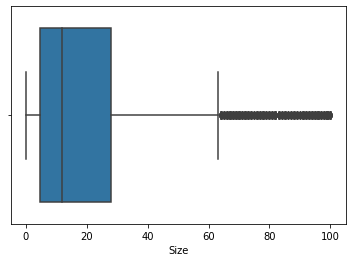

In [ ]:
# Boxplot

sns.boxplot(data = data[data['Size'] != 'Varies with device']['Size'], x= data[data['Size'] != 'Varies with device']['Size'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


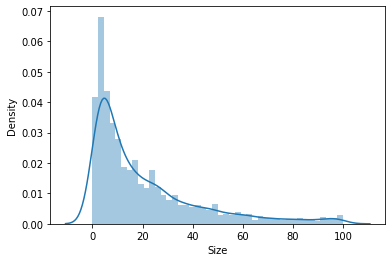

In [ ]:
# Distplot

sns.distplot(data[data['Size'] != 'Varies with device']['Size'])

* It is clear from the visualizations that the data in the `Size` column is skewed towards the right. 
* Also, we see that a vast majority of the entries in this column are of the value `Varies with device`, replacing this with any central tendency value (mean or median) may give incorrect visualizations and results. Hence these values are left as it is.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   object        
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 1.0+ MB


We have successfully converted all the valid entries in the `Size` column to a single unit of measure (MB) and the datatype from string to float.

**6. Converting the datatype of values in the `Reviews` column from string to int.**

In [ ]:
# Converting the datatype of the values in the reviews column from string to int

data['Reviews'] = data['Reviews'].astype(int)
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
data.describe()

,Rating,Reviews,Installs,Price
count,9649.000000,9.649000e+03,9.649000e+03,9649.000000
mean,4.192476,2.168145e+05,7.785404e+06,1.100079
std,0.496528,1.832255e+06,5.378557e+07,16.860857
min,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,4.000000,2.500000e+01,1.000000e+03,0.000000
50%,4.300000,9.690000e+02,1.000000e+05,0.000000
75%,4.500000,2.944500e+04,1.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9649 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9649 non-null   object        
 1   Category        9649 non-null   object        
 2   Rating          9649 non-null   float64       
 3   Reviews         9649 non-null   int64         
 4   Size            9649 non-null   object        
 5   Installs        9649 non-null   int64         
 6   Type            9649 non-null   object        
 7   Price           9649 non-null   float64       
 8   Content Rating  9649 non-null   object        
 9   Genres          9649 non-null   object        
 10  Last Updated    9649 non-null   datetime64[ns]
 11  Current Ver     9649 non-null   object        
 12  Android Ver     9649 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(8)
memory usage: 1.0+ MB


  We have successfully converted the datatype of the values in the `Reviews` column from string to int.

Now that we have handled the errors and NaN values in the `playstoredata.csv` file, lets do the same for the userreviews.csv file.

  # **Exploring User reviews:**

In [ ]:
# Reading the userreviews.csv file
user_data = pd.read_csv("/content/drive/My Drive/Alma Better/Projects/EDA - Play Store App Review Analysis/User Reviews.csv")

In [ ]:
# Checking the top 5 rows of the data
user_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [ ]:
# Shape of the dataframe
user_data.shape

(64295, 5)

The dataframe contains 64295 rows of data.

In [ ]:
# Columns in the df

user_data.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [ ]:
# Checking the descriptive statistics
user_data.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37432.000000,37432.000000
mean,0.182146,0.492704
std,0.351301,0.259949
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


In [ ]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


**Let us first define what information the columns contain based on our inspection.**

* `App`: Contains the name of the app with a short description (optional).
* `Translated_Review`: It contains the English translation of the review dropped by the user of the app.
* `Sentiment`: It gives the attitude/emotion of the writer. It can be ‘Positive’, ‘Negative’, or ‘Neutral’.
* `Sentiment_Polarity`: It gives the polarity of the review. Its range is [-1,1], where 1 means ‘Positive statement’ and -1 means a ‘Negative statement’.
* `Sentiment_Subjectivity`: This value gives how close a reviewers opinion is to the opinion of the general public. Its range is [0,1]. Higher the subjectivity, closer is the reviewers opinion to the opinion of the general public, and lower subjectivity indicates the review is more of a factual information.








# **Handling the error and NaN values in the User reviews:**

In [ ]:
from collections import UserDict
# Finding the total no of NaN values in each column.

user_data.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

There are a lot of NaN values. We need to analyse these values and see how we can handle them.

In [ ]:
# checking the NaN values in the translated rview column

user_data[user_data['Translated_Review'].isnull()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
2,10 Best Foods for You,NaN,NaN,NaN,NaN
7,10 Best Foods for You,NaN,NaN,NaN,NaN
15,10 Best Foods for You,NaN,NaN,NaN,NaN
102,10 Best Foods for You,NaN,NaN,NaN,NaN
107,10 Best Foods for You,NaN,NaN,NaN,NaN
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


There are a total of 26868 rows containing NaN values in the `Translated_Review` column.

We can say that the apps which do not have a review (NaN value insted) tend to have NaN values in the columns `Sentiment`, `Sentiment_Polarity`, and `Sentiment_Subjectivity` in the majority of the cases.

Lets check if there are any exceptions.

In [ ]:
# The rows corresponding to the NaN values in the translated_review column, where the rest of the columns are non null.

user_data[user_data['Translated_Review'].isnull() & user_data['Sentiment'].notna()]

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
268,11st,NaN,Neutral,0.0,0.0
15048,Birds Sounds Ringtones & Wallpapers,NaN,Neutral,0.0,0.0
22092,Calorie Counter - MyFitnessPal,NaN,Neutral,0.0,0.0
31623,DC Comics,NaN,Neutral,0.0,0.0
52500,Garden Photo Frames - Garden Photo Editor,NaN,Neutral,0.0,0.0


In the few exceptional cases where the values of remaining columns are non null for null values in the `translated_Review` column, there seems to be errors. This is because the Sentiment, sentiment ploarity and sentiment subjectivity  of the review can be determined if and only if there is a corresponding review.

Hence these values are wrong and can be deleted altogather.

In [ ]:
# Deleting the rows containing NaN values

user_data = user_data.dropna()

In [ ]:
# The shape of the updated df

user_data.shape

(37427, 5)

There are a total of 37427 rows in the updated df.

Hence we have taken care of all the NaN values in the df.

Lets inspect the updated df.

In [ ]:
# Inspecting the sentiment column
user_data['Sentiment'].value_counts()


Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

In [ ]:
user_data[user_data['Sentiment'] == 'Negative'].head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500,0.500
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200,0.000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200,0.000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800,0.800
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325,0.475


In [ ]:
user_data[user_data['Sentiment'] == 'Neutral'].head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
8,10 Best Foods for You,"Looking forward app,",Neutral,0.0,0.0
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.0,0.0
22,10 Best Foods for You,God health,Neutral,0.0,0.0
25,10 Best Foods for You,I found lot wealth form health...,Neutral,0.0,0.0
29,10 Best Foods for You,On test....,Neutral,0.0,0.0


In [ ]:
user_data.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


The values in the `Sentiment_Polarity` and `Sentiment_Subjectivity` looks correct.

On the given datasets, we successfully developed a data pipeline. We can now examine this data flow and create user-friendly visuals. It is easy to compare different measures using the visualizations, and thus to draw implications from them.

# **Data Visualization on play store data:**

We have sucessfully cleaned the dirty data. Now we can perform some data visualization and come up with insights on the given datasets.

**1. Correlation Heatmap**

In [ ]:
# Finding correlation between different columns in the play store data
data.corr()


,Rating,Reviews,Installs,Price
Rating,1.000000,0.050212,0.034306,-0.018674
Reviews,0.050212,1.000000,0.625158,-0.007603
Installs,0.034306,0.625158,1.000000,-0.009412
Price,-0.018674,-0.007603,-0.009412,1.000000


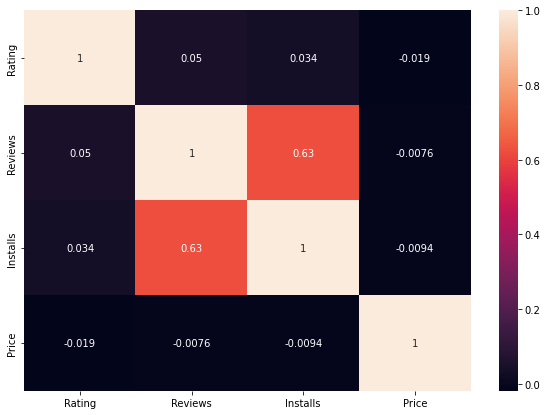

In [ ]:
# Correlation heatmap
plt.figure(figsize = (10,7))
sns.heatmap(data.corr(),annot=True)


* There is a strong positive correlation between the `Reviews` and `Installs` column. This is pretty much obvious. Higher the number of installs, higher is the user base, and higher are the total number of reviews dropped by the users.
* The `Price` is slightly negatively correlated with the `Rating`, `Reviews`, and `Installs`. This means that as the prices of the app increases, the average rating, total number of reviews and Installs fall slightly.
* the `Rating` is slightly positively correlated with the `Installs` and `Reviews` column. This indicates that as the the average user rating increases, the app installs and number of reviews also increase.

**2. Percentage of free apps and paid in the database**

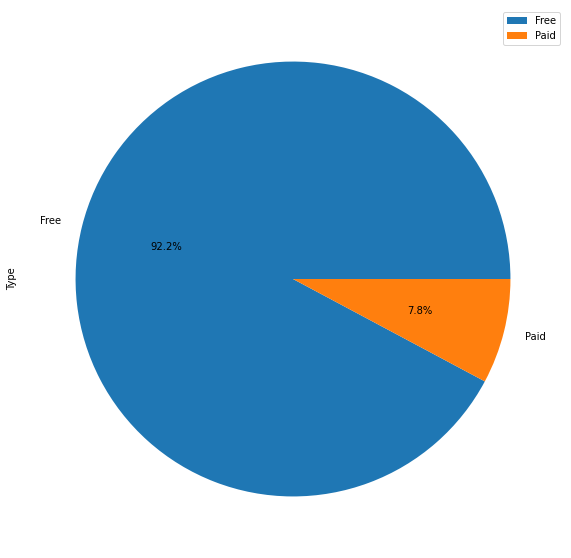

In [ ]:
# Pie chart defining the type of the app
data['Type'].value_counts().plot.pie(figsize=(10,10), autopct='%1.1f%%')

plt.legend()

The majority of the apps in theplay store are of Free type.

**3. Content rating**

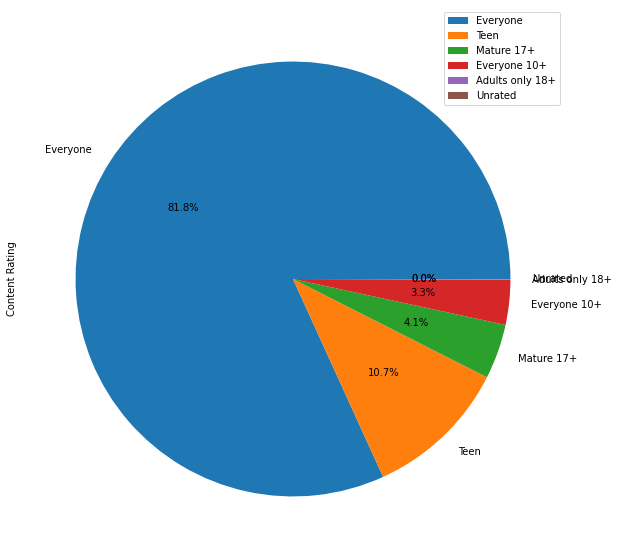

In [ ]:
# Content rating of the apps

data['Content Rating'].value_counts().plot.pie(figsize = (10,10), autopct='%1.1f%%')
plt.legend()

A majority of the apps (81.8%) in the play store are can be used by everyone.The remaining apps have various age restrictions to use it.

**4. Number of apps present in each category.**

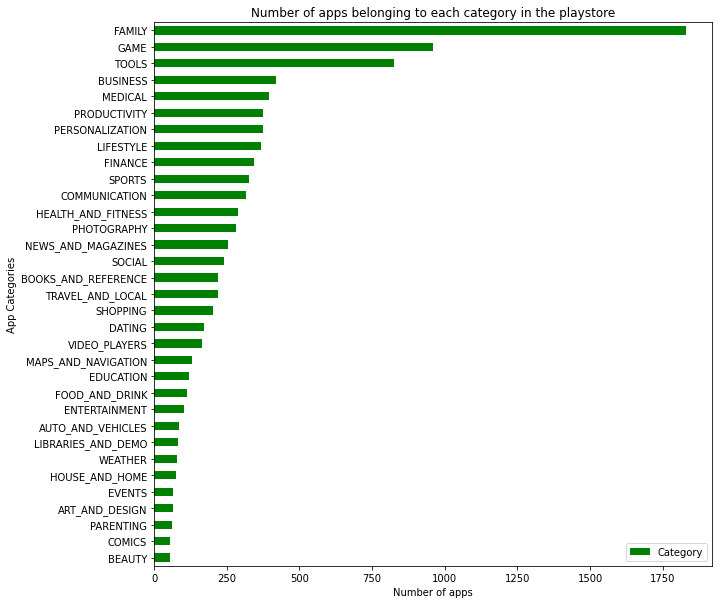

In [ ]:
# No of apps in each category
data['Category'].value_counts().plot.barh(figsize=(10,10), color= 'g').invert_yaxis()
plt.ylabel('App Categories')
plt.xlabel('Number of apps')
plt.title('Number of apps belonging to each category in the playstore')
plt.legend()

This visualization tells us how competitive a particular category is in the app store. `Family`, `Game`, and `Tools` category have the maximum number of apps compared to other categories.

**5. Total app installs in each category**

Text(0.5, 1.0, 'Total app installs in each category')

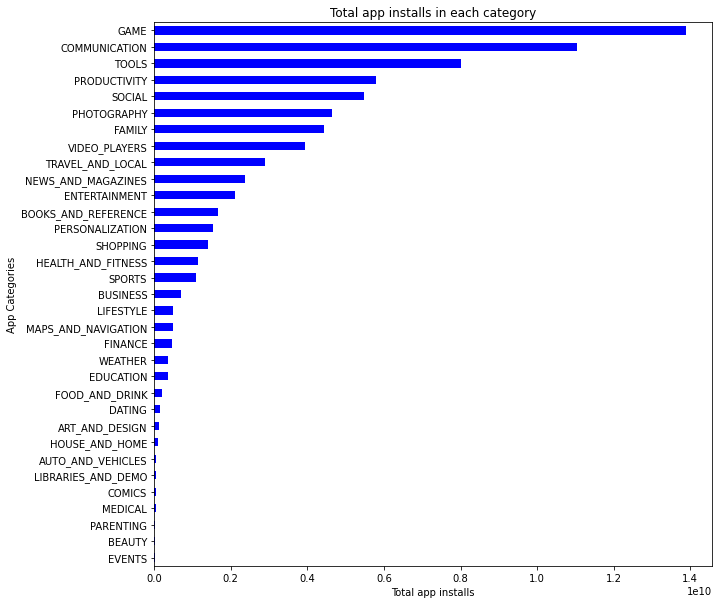

In [ ]:
# total app installs in each category of the play store
a = data.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(10,10), color = 'b')
plt.xlabel('Total app installs')
plt.ylabel('App Categories')
plt.xticks()
plt.title('Total app installs in each category')

This tells us the category of apps that has the maximum number of installs. The `Game`, `Communication` and `Tools` categories has the highest number of installs compared to other categories of apps.

**6. Average number of app installs in each category**

Text(0.5, 1.0, 'Average number of app installs in each category')

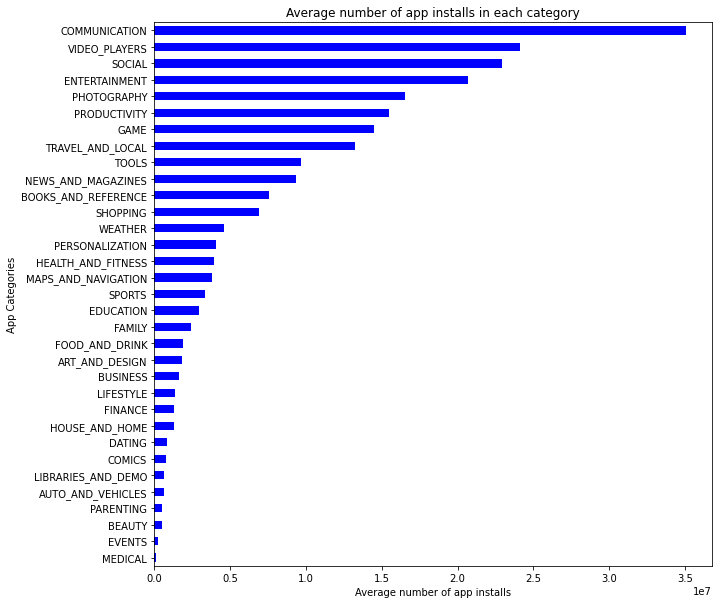

In [ ]:
# Average no of app installs in each category of the play store
a = data.groupby('Category')['Installs'].mean().sort_values()
a.plot.barh(figsize=(10,10), color = 'b')
plt.xlabel('Average number of app installs')
plt.ylabel('App Categories')
plt.xticks()
plt.title('Average number of app installs in each category')

This visualization gives the average number of installs an app has in each category. The apps in the `Communication`, `Video players` and `Social` categories has the highest number of average installs compared to the apps in other categories.

**7. Average rating of the apps**

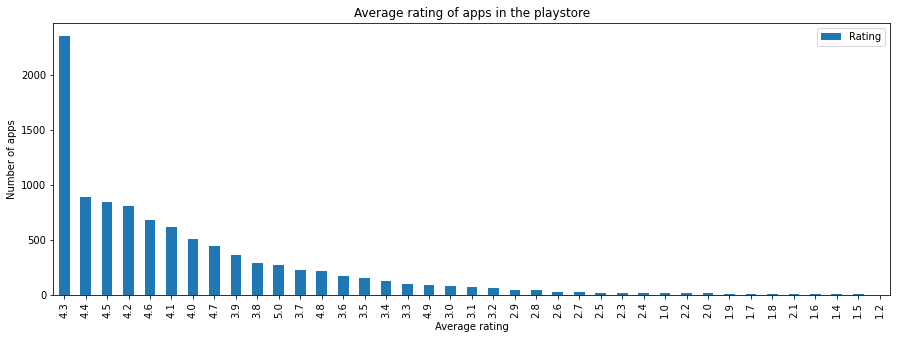

In [ ]:
# Average app ratings
data['Rating'].value_counts().plot.bar(figsize=(15,5))
plt.xlabel('Average rating')
plt.ylabel('Number of apps')
plt.title('Average rating of apps in the playstore')
plt.legend()

The majority of the apps in the app store are Top rated.

**8. Top apps that are of free type.**

In [ ]:
#Creating a df for only free apps
free_df = data[data['Type'] == 'Free']
free_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,4.3,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [ ]:
# Creating a df for top free apps
free_df['Installs'] == free_df['Installs'].max()
top_free_df = free_df[free_df['Installs'] == free_df['Installs'].max()]
top_free_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
152,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,1000000000,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
338,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
340,Gmail,COMMUNICATION,4.3,4604324,Varies with device,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device


In [ ]:
top_free_df.shape

(20, 13)

In [ ]:
# Top free apps

top_free_df['App']

152                            Google Play Books
335     Messenger – Text and Video Chat for Free
336                           WhatsApp Messenger
338                 Google Chrome: Fast & Secure
340                                        Gmail
341                                     Hangouts
391                Skype - free IM & video calls
865                            Google Play Games
1654                              Subway Surfers
2544                                    Facebook
2545                                   Instagram
2554                                     Google+
2808                               Google Photos
3117                   Maps - Navigate & Explore
3127                          Google Street View
3234                                      Google
3454                                Google Drive
3665                                     YouTube
3687                     Google Play Movies & TV
3736                                 Google News
Name: App, dtype: ob

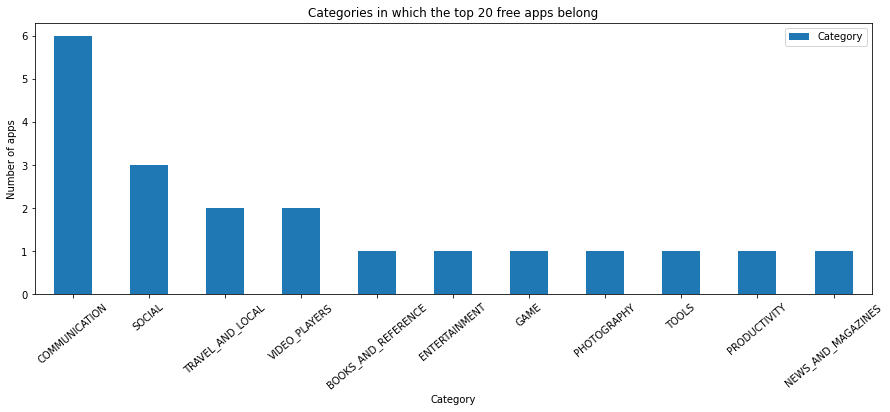

In [ ]:
# Categories in which the top 20 free apps belong to

top_free_df['Category'].value_counts().plot.bar(figsize=(15,5))
plt.xlabel('Category')
plt.ylabel('Number of apps')
plt.title('Categories in which the top 20 free apps belong')
plt.xticks(rotation=40)
plt.legend()

**9. Top apps that are of paid type.**

In [ ]:
# Creating a df containing only paid apps

paid_df = data[data['Type'] == 'Paid']
paid_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,10000,Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up
477,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up


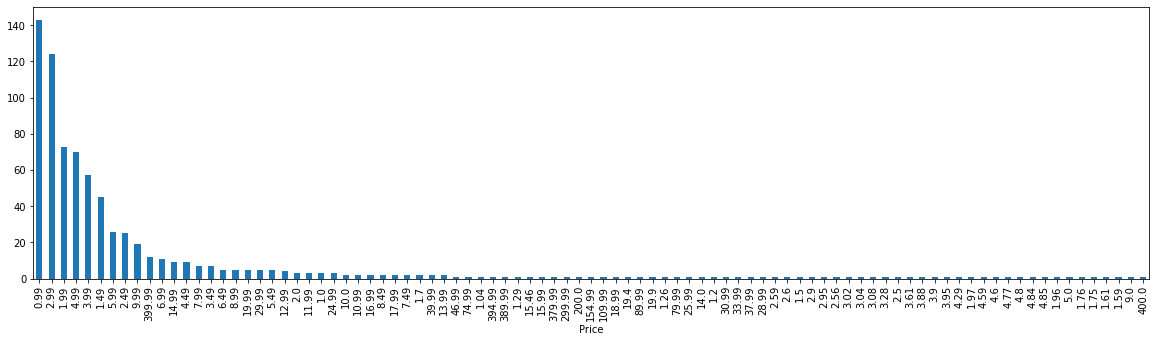

In [ ]:
# Number of apps that can be installed at a particular price 
paid_df.groupby('Price')['App'].count().sort_values(ascending=False).plot.bar(figsize = (20,5))


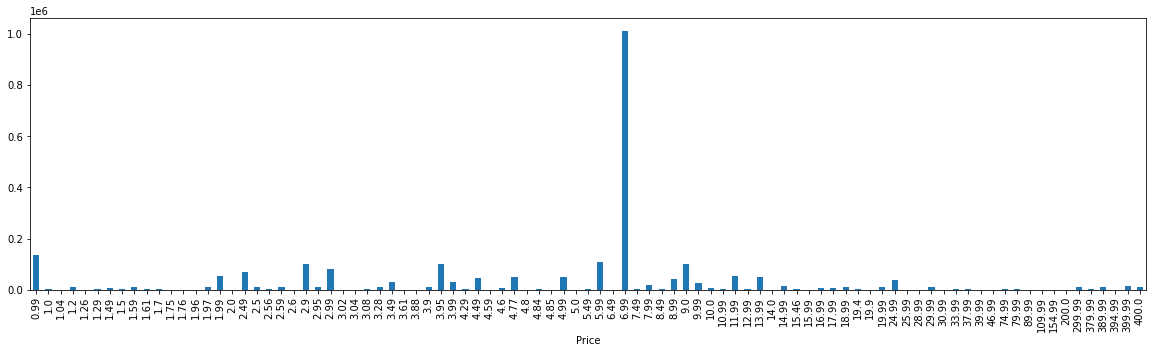

In [ ]:
# Average number of paid app installs 

paid_df.groupby('Price')['Installs'].mean().plot.bar(figsize=(20,5))

* The paid apps charge the users a certain amount to download and install the app. This amount varies from one app to another.
* There are a lot of apps that charge a small amount whereas some apps charge a larger amount. In this case the price to download an app varies from USD 0.99 to USD 400.
* In order to select the top paid apps, it won't be fair to look just into the numer of installs. This is because the apps that charge a lower installation fee will be installed by more number of people in general.
* Here a better way to determine the top apps in the paid category is by finding the revenue it generated through app installs.
* This is given by:

 Revenue generated through installs = (Number of installs)x(Price to install the app)


Lets define a new column `Revenue` in paid_df which gives the revenue generated by the app through installs alone. 

In [ ]:
# Creatng a new column 'Revenue' in paid_df

paid_df['Revenue'] = paid_df['Installs']*paid_df['Price']
paid_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6.8,100000,Paid,4.99,Everyone,Business,2018-03-25,1.5.2,4.0 and up,499000.0
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39.0,100000,Paid,4.99,Everyone,Business,2017-04-11,3.4.6,3.0 and up,499000.0
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,Varies with device,100000,Paid,3.99,Everyone,Communication,2018-07-05,7.5.3.20547,4.1 and up,399000.0
476,"Moco+ - Chat, Meet People",DATING,4.2,1545,Varies with device,10000,Paid,3.99,Mature 17+,Dating,2018-06-19,2.6.139,4.1 and up,39900.0
477,Calculator,DATING,2.6,57,6.2,1000,Paid,6.99,Everyone,Dating,2017-10-25,1.1.6,4.0 and up,6990.0


In [ ]:
# Top app in the paid category

paid_df[paid_df['Revenue'] == paid_df['Revenue'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
2241,Minecraft,FAMILY,4.5,2376564,Varies with device,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,69900000.0


In [ ]:
# Top 20 paid apps in the play store

top_paid_df = paid_df.nlargest(20, 'Revenue')
top_paid_df['App']

2241                                           Minecraft
5351                                           I am rich
5356                                   I Am Rich Premium
4034                                       Hitman Sniper
7417                       Grand Theft Auto: San Andreas
2883                                 Facetune - For Free
5578                             Sleep as Android Unlock
8804                                 DraStic DS Emulator
4367                            I'm Rich - Trump Edition
4362                                          💎 I'm rich
5354                                      I am Rich Plus
5366                                           I Am Rich
5355                                       I am rich VIP
4133                                        Weather Live
2242                          Card Wars - Adventure Time
5631                             Five Nights at Freddy's
7355                                             Threema
8860                           

In [ ]:
top_paid_df.shape

(20, 14)

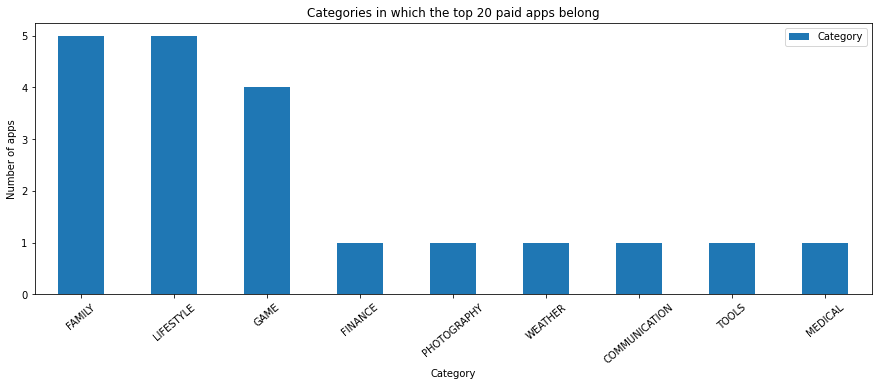

In [ ]:
# Categories in which the top 20 paid apps belong to

top_paid_df['Category'].value_counts().plot.bar(figsize=(15,5))
plt.xlabel('Category')
plt.ylabel('Number of apps')
plt.title('Categories in which the top 20 paid apps belong')
plt.xticks(rotation=40)
plt.legend()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


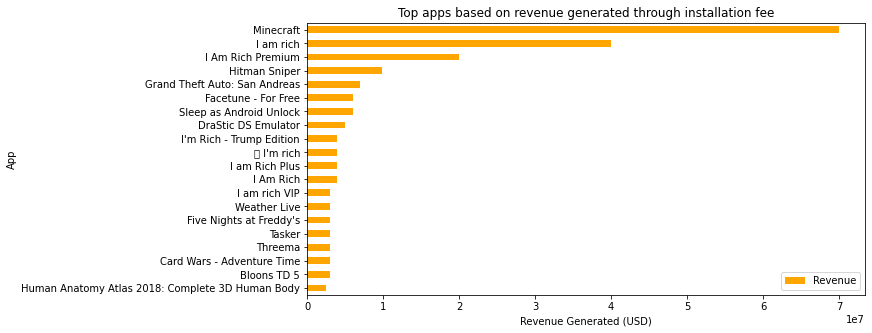

In [ ]:
# Top paid apps according to the revenue generated through installs alone

top_paid_df.groupby('App')['Revenue'].mean().sort_values().plot.barh(figsize=(10,5), color = 'orange')
plt.xlabel('Revenue Generated (USD)')
plt.title('Top apps based on revenue generated through installation fee')
plt.legend()

In [ ]:
# Paid apps with the highest number of installs

paid_df[paid_df['Revenue'] == paid_df['Revenue'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
2241,Minecraft,FAMILY,4.5,2376564,Varies with device,10000000,Paid,6.99,Everyone 10+,Arcade;Action & Adventure,2018-07-24,1.5.2.1,Varies with device,69900000.0


There is only one paid app with more than 10M+ installs.

**10. Average price of paid apps in each category**

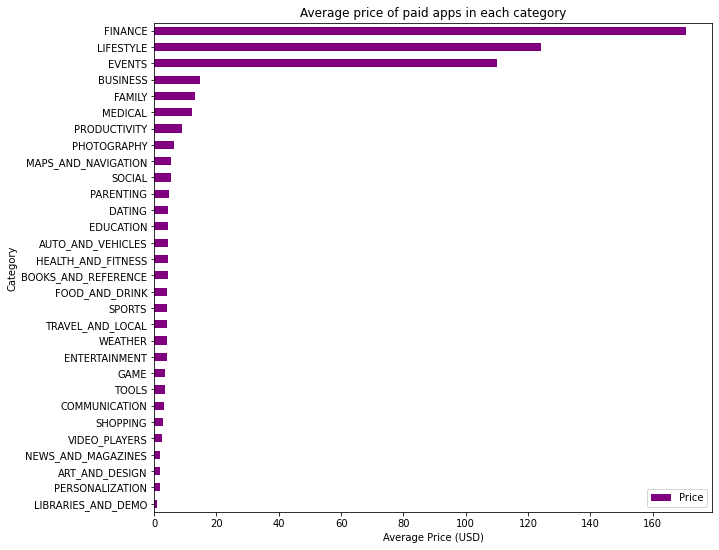

In [ ]:
# Average price of paid apps in each category

paid_df.groupby('Category')['Price'].mean().sort_values(ascending=False).plot.barh(figsize = (10,9), color='purple').invert_yaxis()
plt.xlabel('Average Price (USD)')
plt.title('Average price of paid apps in each category')
plt.legend()

**11. Top 20 apps with the highest number of user reviews**

Text(0.5, 1.0, 'Top 20 apps with the highest number of user reviews')

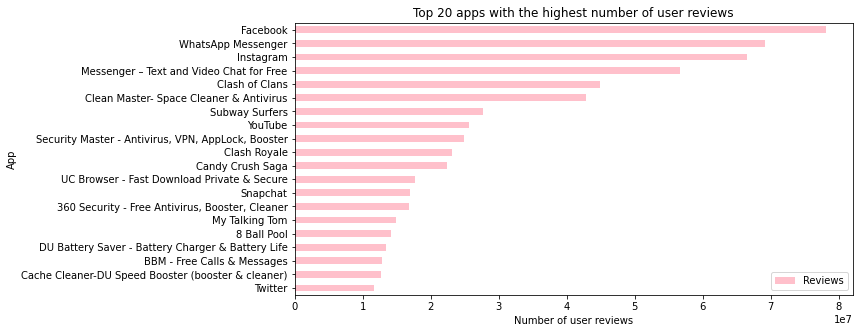

In [ ]:
# Top apps with the highest number of user reviews

data.groupby('App')[['Reviews','App']].sum().nlargest(20,['Reviews']).plot.barh(figsize = (10,5), color = 'pink').invert_yaxis()
plt.xlabel('Number of user reviews')
plt.title('Top 20 apps with the highest number of user reviews')

We can say that the apps with the highest number of user reviews are the most popular apps in the play store.

**12. Distribution of apps based on its size**

In [ ]:
# Values calculated earlier

max_size,min_size,mean_size,median_size

(100.0, 0.0083, 20.4136, 12.0)

* The size of an app in our database varies from 100 MB to 0.0083 MB. We can analyse the size of the apps if we can group them into certain intervals.
* We have already established that the data in the numeric values in the 'Size' column are skewed towards the left.
* Lets group the data in the size column as follows into intervals of 10 each:

(< 1 MB, 1-10, 10-20, 20-30, ..., 90-100, 'Varies with device')

Lets create a function to create the size intervals

In [ ]:
# Function to group the apps based on its size in MB

def size_group(var):
  '''
  This function groups the size of an app 
  between ~0 to 100 MB into certain intervals.
  '''
  try:
    if var < 1:
      return 'Below 1'
    elif var >= 1 and var <10:
      return '1-10'
    elif var >= 10 and var <20:
      return '10-20'
    elif var >= 20 and var <30:
      return '20-30'
    elif var >= 30 and var <40:
      return '30-40'
    elif var >= 40 and var <50:
      return '40-50'
    elif var >= 50 and var <60:
      return '50-60'
    elif var >= 60 and var <70:
      return '60-70'
    elif var >= 70 and var <80:
      return '70-80'
    elif var >= 80 and var <90:
      return '80-90'
    else:
      return '90 and above'
  except:
    return var

Lets apply the `size_group` function on the `Size` column and store the results in a new column named `Size group`.

In [ ]:
# applying the size_group function on the main df

data['Size group'] = data['Size'].apply(lambda x: size_group(x))
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size group
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,10-20
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,10-20
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1-10
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,20-30
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,1-10


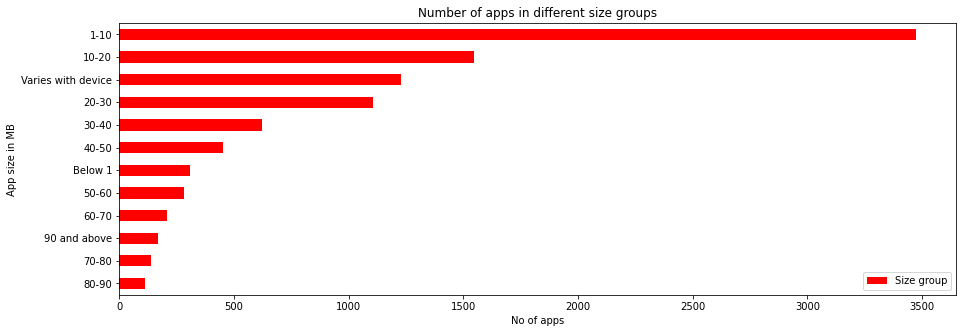

In [ ]:
# no of apps belonging to each size group

data['Size group'].value_counts().plot.barh(figsize=(15,5), color='red').invert_yaxis()
plt.title("Number of apps in different size groups")
plt.xlabel('No of apps')
plt.ylabel('App size in MB')
plt.legend()

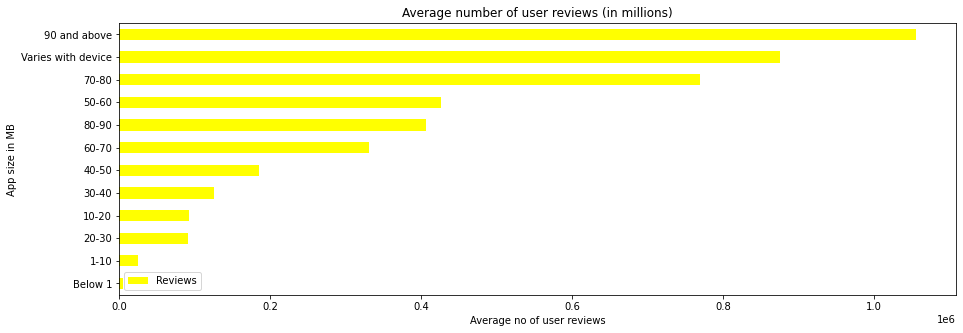

In [ ]:
# average no of user reviews in each size group

data.groupby('Size group')['Reviews'].mean().sort_values().plot.barh(figsize=(15,5), color = 'yellow')
plt.title("Average number of user reviews (in millions)")
plt.xlabel('Average no of user reviews')
plt.ylabel('App size in MB')
plt.legend()

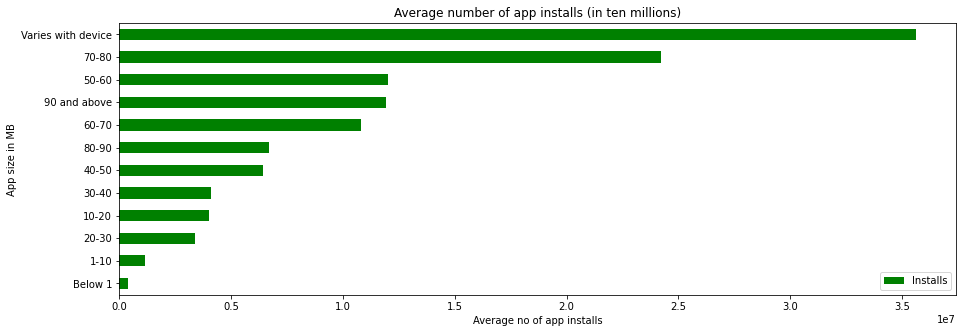

In [ ]:
# average number of app installs in each category

data.groupby('Size group')['Installs'].mean().sort_values().plot.barh(figsize=(15,5), color='green')
plt.title("Average number of app installs (in ten millions)")
plt.xlabel('Average no of app installs')
plt.ylabel('App size in MB')
plt.legend()

* The sizes of the majority of the apps range in between 1 and 20 MB. 
* There are a good number of apps whose size varies with the device.
* The apps which are smaller in size on average have lower no of app installs and user reviews.

# **Data visualization on User reviews:**

In [ ]:
# Basic inspection

user_data.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [ ]:
# Review sentiment for each app

user_data.groupby('App')['Sentiment'].value_counts()

App                               Sentiment
10 Best Foods for You             Positive     162
                                  Neutral       22
                                  Negative      10
104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室  Positive      31
                                  Neutral        8
                                              ... 
Hotwire Hotel & Car Rental App    Neutral       11
                                  Negative       6
Housing-Real Estate & Property    Negative      10
                                  Positive       8
                                  Neutral        3
Name: Sentiment, Length: 2376, dtype: int64

**1. Apps with the highest number of positive reviews**

In [ ]:
# positive reviews

positive_reviews_df = user_data[user_data['Sentiment'] == 'Positive']
positive_reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
...,...,...,...,...,...
64217,Housing-Real Estate & Property,"I able set range 1cr, scroll space 0-1cr range...",Positive,0.233333,0.550000
64221,Housing-Real Estate & Property,Everything old stuff neither clear sold proper...,Positive,0.021591,0.259470
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222


Text(0.5, 1.0, 'Apps with the highest number of positive reviews')

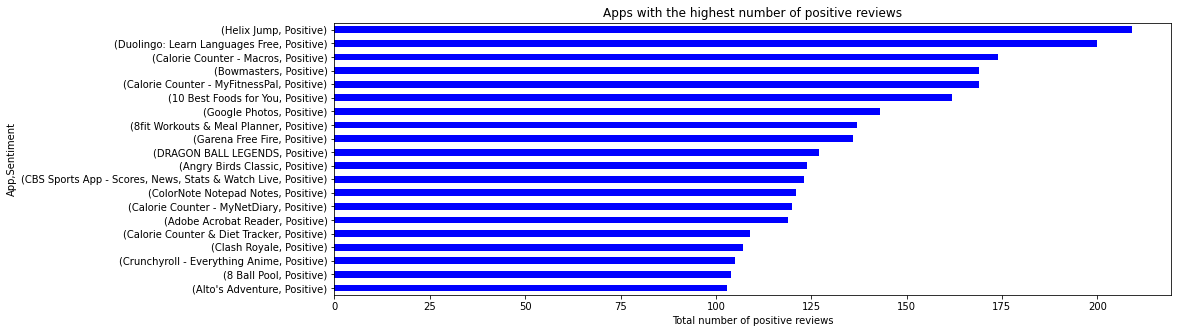

In [ ]:
positive_reviews_df.groupby('App')['Sentiment'].value_counts().nlargest(20).plot.barh(figsize=(15,5), color='blue').invert_yaxis()
plt.xlabel('Total number of positive reviews')
plt.title('Apps with the highest number of positive reviews')

**2. Apps with the highest number of negative reviews**

In [ ]:
# negative reviews

negative_reviews_df = user_data[user_data['Sentiment'] == 'Negative']
negative_reviews_df

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500000,0.500000
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200000,0.000000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200000,0.000000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800000,0.800000
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325000,0.475000
...,...,...,...,...,...
64215,Housing-Real Estate & Property,Horrible app. I wanted list property get aroun...,Negative,-0.528571,0.717262
64216,Housing-Real Estate & Property,Worst app. We get nothing Time waste . They up...,Negative,-0.400000,0.250000
64220,Housing-Real Estate & Property,"No response support team. After I login, unabl...",Negative,-0.377778,0.533333
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000


Text(0.5, 1.0, 'Apps with the highest number of negative reviews')

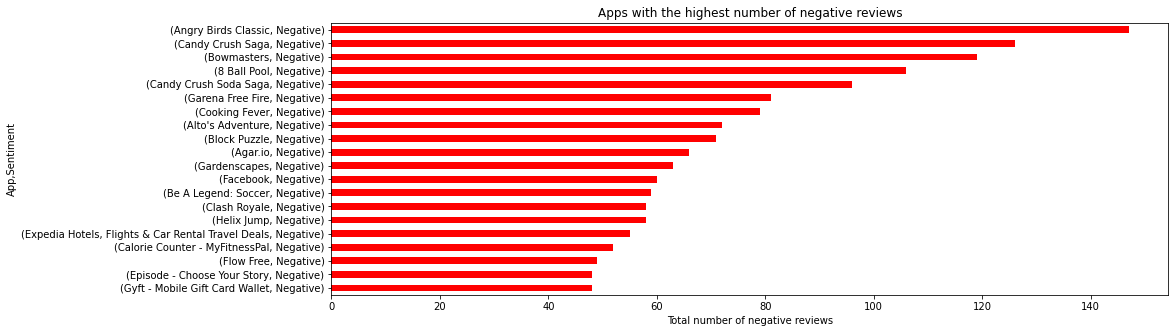

In [ ]:
negative_reviews_df.groupby('App')['Sentiment'].value_counts().nlargest(20).plot.barh(figsize=(15,5), color='r').invert_yaxis()
plt.xlabel('Total number of negative reviews')
plt.title('Apps with the highest number of negative reviews')

# **Analysis Summary:**

* Percentage of free apps = ~92%
* Percentage of apps with no age restrictions = ~82%
* Most competitive category: Family
* Category with the highest number of installs: Game
* Category with the highest average app installs: Communicaction
* Percentage of apps that are top rated = ~80%
* There are 20 free apps that have been installed over a billion times
* Minecraft is the only app in the paid category with over 10M installs. This app has also produced the most revenue only from the installation fee.
* Category in which the paid apps have the highest average installation fee: Finance
* Most popular app in the Play Store based on the number of reviews: Facebook
* The median size of all apps in the play store is 12 MB.
* The apps whose size varies with device has the highest number average app installs.
* The apps whose size is greater than 90 MB has the highest number of average user reviews, ie, they are more popular than the rest.
* Helix Jump has the highest number of positive reviews and Angry Birds Classic has the highest number of negative reviews.

# **Conclusion:**

From this EDA project, the following concepts were learnt:
* Basic inspection of the raw data.
* Examining the business KPIs for app development and devising a solution to the problem.
* Handing the duplicate, error and NaN values present in the dataset, ie, cleaning the data.
* Using different Python functions and libraries to clean and manipulate data.
* Data wrangling to come up with different insights on the data.
* Designing multiple visualizations to summarize the information in the dataset and successfully communicate the results and trends to the reader.

Different Python libraries used to complete this EDA:
* Pandas
* NumPy
* DateTime
* Matplotlib.Pyplot
* Seaborn
